# ANALYSIS ON THE EFFECTS OF  LOAN CHARACTERISTICS ON BORROWER'S APR

## by APEH Kenneth

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Hence, the project seeks to investigate the factors that influence borrow's APR and how each loan were taken by what type of borrowers.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# loading the raw dataset
df_loan = pd.read_csv('ProsperLoanData.csv')

In [4]:
# Dataset previewing
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
# Shape of dataset
df_loan.shape

(113937, 81)

In [6]:
# Checking for number of duplicate in the  dataset
df_loan.duplicated().sum() 

0

In [7]:
# Selecting features of interest by Subseting the dataframe
cols = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus', 'ProsperScore', 'CreditScoreRangeUpper', 'CreditScoreRangeLower']
loan_subset = df_loan[cols]

In [8]:
loan_subset.head()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,ProsperScore,CreditScoreRangeUpper,CreditScoreRangeLower
0,9425,0.16516,3083.333333,36,NaN,Self-employed,NaN,659.0,640.0
1,10000,0.12016,6125.000000,36,A,Employed,7.0,699.0,680.0
2,3001,0.28269,2083.333333,36,NaN,Not available,NaN,499.0,480.0
3,10000,0.12528,2875.000000,36,A,Employed,9.0,819.0,800.0
4,15000,0.24614,9583.333333,36,D,Employed,4.0,699.0,680.0


In [9]:
# Dataset information
loan_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanOriginalAmount     113937 non-null  int64  
 1   BorrowerAPR            113912 non-null  float64
 2   StatedMonthlyIncome    113937 non-null  float64
 3   Term                   113937 non-null  int64  
 4   ProsperRating (Alpha)  84853 non-null   object 
 5   EmploymentStatus       111682 non-null  object 
 6   ProsperScore           84853 non-null   float64
 7   CreditScoreRangeUpper  113346 non-null  float64
 8   CreditScoreRangeLower  113346 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 7.8+ MB


In [10]:
# Checking for missing (null) values on each columns
loan_subset.isnull().sum()

LoanOriginalAmount           0
BorrowerAPR                 25
StatedMonthlyIncome          0
Term                         0
ProsperRating (Alpha)    29084
EmploymentStatus          2255
ProsperScore             29084
CreditScoreRangeUpper      591
CreditScoreRangeLower      591
dtype: int64

In [11]:
# Checking the descriptive statistics for numeric variables
loan_subset.describe()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperScore,CreditScoreRangeUpper,CreditScoreRangeLower
count,113937.00000,113912.000000,1.139370e+05,113937.000000,84853.000000,113346.000000,113346.000000
mean,8337.01385,0.218828,5.608026e+03,40.830248,5.950067,704.567731,685.567731
std,6245.80058,0.080364,7.478497e+03,10.436212,2.376501,66.458275,66.458275
min,1000.00000,0.006530,0.000000e+00,12.000000,1.000000,19.000000,0.000000
25%,4000.00000,0.156290,3.200333e+03,36.000000,4.000000,679.000000,660.000000
50%,6500.00000,0.209760,4.666667e+03,36.000000,6.000000,699.000000,680.000000
75%,12000.00000,0.283810,6.825000e+03,36.000000,8.000000,739.000000,720.000000
max,35000.00000,0.512290,1.750003e+06,60.000000,11.000000,899.000000,880.000000


In [12]:
# Remove loans with missing borrower APR information
loan_subset = loan_subset[~loan_subset.BorrowerAPR.isna()]

### Testing

In [13]:
loan_subset.isnull().sum()

LoanOriginalAmount           0
BorrowerAPR                  0
StatedMonthlyIncome          0
Term                         0
ProsperRating (Alpha)    29059
EmploymentStatus          2230
ProsperScore             29059
CreditScoreRangeUpper      566
CreditScoreRangeLower      566
dtype: int64

In [87]:
# Assigning a new name to the dataset
df_loan_clean = loan_subset

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including BorrowerAPR,LoanOriginalAmount, StatedMonthlyIncome, EmploymentStatus, and many others.

### What is/are the main feature(s) of interest in your dataset?

> The main focus of this project is to find out features that are best for predicting the Borrower's Annual Percentage Rate (APR) for the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The total loan amount could have a negative effect on the BorrowerAPR of the loan being that the larger the total loan amount, the lower the BorrowerAP. Likewise, the Prosper Rating and Prosper Score could show low Borrower's APR because higher rating reflect the borrower's personality to be more trustworthy. In addition, the borrowers stated monthly income, loan term, Prosper rating, employment status, CreditScoreRangeUpper, CreditScoreRangeLower could also have effects on the APR.

## Univariate Exploration
> In this section, I will be look at Borrower's Annual Percentage Rate (APR) Counts and its distribution

In [15]:
# Checking for the highest BorrowerAPR counts
df_loan_clean.BorrowerAPR.value_counts().head()

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
Name: BorrowerAPR, dtype: int64

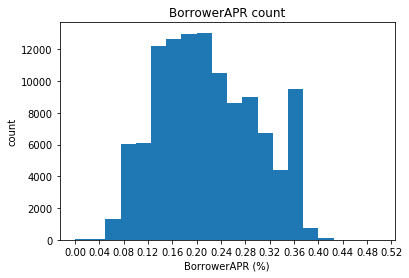

In [16]:
# Distribution of the counts for all BorrowerAPR values
bins = np.arange(0, df_loan_clean['BorrowerAPR'].max(), 0.025)
plt.hist(data = df_loan_clean, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, df_loan_clean['BorrowerAPR'].max()+0.04, 0.04));

The Borrower APR graph distribution looks multimodally distributed. Although two exceptional high counts can be seen on the graph when BorrowerAPR are 3672 (0.35797%) and 1644 (0.35643%). In light of this, very few loans have APR greater than 0.44.

In [17]:
# Check loans with APR greater than 0.44
df_loan_clean[df_loan_clean.BorrowerAPR>0.44]

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,ProsperScore,CreditScoreRangeUpper,CreditScoreRangeLower
18326,3000,0.45857,10000.000000,36,NaN,NaN,NaN,NaN,NaN
22195,1789,0.46201,2916.666667,36,NaN,NaN,NaN,NaN,NaN
36018,1500,0.51229,2838.000000,36,NaN,NaN,NaN,NaN,NaN
56761,3000,0.50633,0.000000,36,NaN,NaN,NaN,NaN,NaN
82043,3000,0.48873,1583.333333,36,NaN,NaN,NaN,NaN,NaN
103973,2800,0.45857,3750.000000,36,NaN,NaN,NaN,NaN,NaN


There are six(6) borrowers with higher APR, but they have small loan amount. In addition,  Prosper rating, employment status, prosper score, Credit Score Range Upper and	Credit Score Range Lower have no records.

Up next, I will be looking at the distribution of the first predictor variable of interest which is *LoanOriginalAmount*

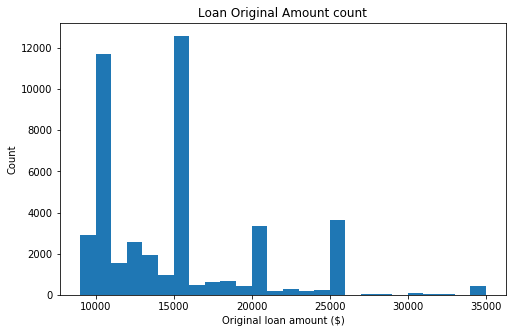

In [18]:
# Distribution of Loan Original Amount
bins = np.arange(9000, df_loan_clean.LoanOriginalAmount.max()+1000, 1000)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan_clean, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount count')
plt.ylabel('Count')
plt.xlabel('Original loan amount ($)');

From the graph, we can see that the very high spikes in frequency are at 10k, 15k, 20k and 25k.

Furthermore, I will be looking at the distributions of other variables of interest.

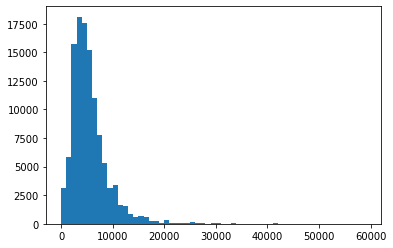

In [19]:
# Distribution of stated monthly income
bins_smi = np.arange(0, 60000, 1000)
plt.hist(data = df_loan_clean, x = 'StatedMonthlyIncome', bins=bins_smi);

The distribution of stated monthly income is right screwed, with less than 30,000 stated monthly income.

In [20]:
# Checking for borrowers with stated monthly income greater than 100,000
df_loan_clean[df_loan_clean.StatedMonthlyIncome>100000].count()

LoanOriginalAmount       17
BorrowerAPR              17
StatedMonthlyIncome      17
Term                     17
ProsperRating (Alpha)    12
EmploymentStatus         17
ProsperScore             12
CreditScoreRangeUpper    17
CreditScoreRangeLower    17
dtype: int64

It can can seen that prosper rating and prosper score have 12 borrowers whose stated monthly income are greater than 100000 while others have 17 brrowers each.

In [21]:
# Percent of borrowers whose stated monthly income greater than 30,000
sum_of_above_30k = (df_loan_clean.StatedMonthlyIncome>30000).sum()
total = float(df_loan_clean.shape[0])

sum_of_above_30k/total

0.0028706369829341947

This indicated that less than 0.3 percent of borrowers have stated monthly income greater than 30k, this is a portential outlier. Hence, it is better to remove borrower records with income greater than 30k.

In [22]:
# Removing of loans with stated monthly income greater than 30k, which are outliers
df_loan_clean = df_loan_clean[df_loan_clean.StatedMonthlyIncome<=30000]

In [23]:
#Confirmation
(df_loan_clean.StatedMonthlyIncome>30000).sum()

0

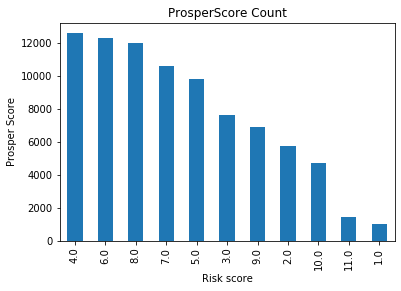

In [24]:
#  Distribution of which ProsperScore borrowers received the most
df_loan_clean['ProsperScore'].value_counts().plot(kind='bar')
plt.title('ProsperScore Count')
plt.xlabel('Risk score')
plt.ylabel('Prosper Score')
plt.fontsize = 12
plt.figsize=(12,12)

It can be seen that the higher the risk score the lower the perosper score. Which means that the higher risk scores, the lower the risk taken

C:\Users\Ken\anaconda3\anaconda3.7\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


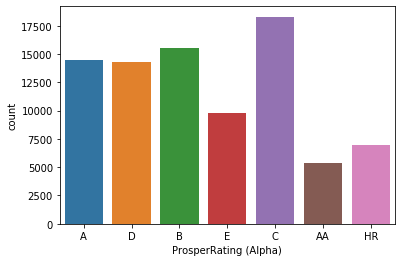

In [25]:
# Convert ProsperRating into ordered categorical types and plotting the graph
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
df_loan_clean.loc['ProsperRating (Alpha)'] = df_loan_clean['ProsperRating (Alpha)'].astype(ordered_var)

#The plot
sb.countplot(data = df_loan_clean, x = 'ProsperRating (Alpha)');

The Borrowers Rating are displayed in order from highest rating to lowest rating (AA, A, B, C, D, E, HR). We can see a pattern that the highest rating of AA received lowest APR, whereas the ratings of most of the borrowers are among D to A.

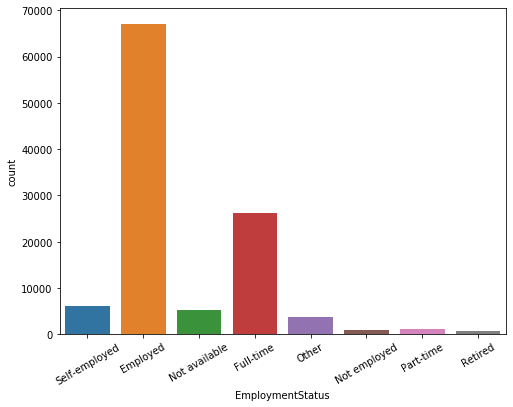

In [26]:
# Convert  Employment status into ordered categorical type and plotting the graph
emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
df_loan_clean.loc['EmploymentStatus'] = df_loan_clean['EmploymentStatus'].astype(ordered_var)

#The plot
plt.figure(figsize = [8,6])
sb.countplot(data = df_loan_clean, x = 'EmploymentStatus')
plt.xticks(rotation=30);

Refrenence: https://seaborn.pydata.org/generated/seaborn.countplot.html
        
        From the graph, it can be seen that most of the borrowers are employed and full-time workers.

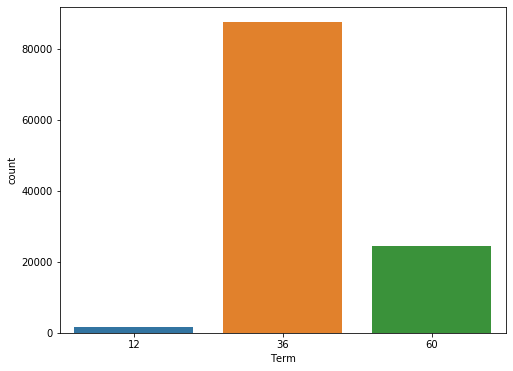

In [27]:
#The plot for Term
plt.figure(figsize = [8,6])
sb.countplot(data = df_loan_clean, x = 'Term');

The length of term of loan durations are mostly 36 months.

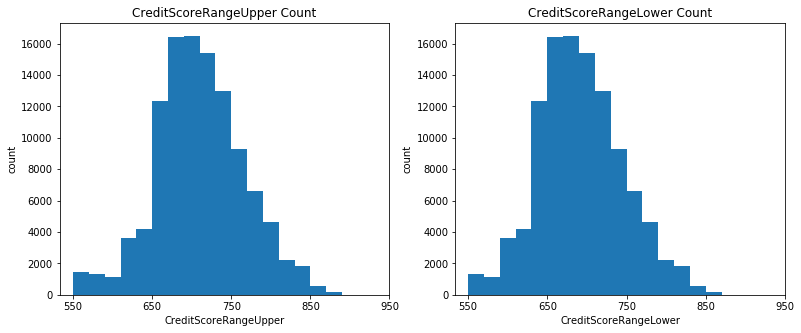

In [28]:
# Plot for Credit Score Range for both upper and lower
plt.figure(figsize = [13, 5]) 

plt.subplot(1, 2, 1)
bins = np.arange(550, df_loan_clean['CreditScoreRangeUpper'].max(), 20)
plt.hist(data = df_loan_clean, x = 'CreditScoreRangeUpper', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
plt.title('CreditScoreRangeUpper Count')
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('count');

plt.subplot(1, 2, 2)
bins = np.arange(550, df_loan_clean['CreditScoreRangeLower'].max(), 20)
plt.hist(data = df_loan_clean, x = 'CreditScoreRangeLower', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
plt.title('CreditScoreRangeLower Count')
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('count');

In [29]:
# check for outliers for credit score
print (df_loan.CreditScoreRangeUpper.describe())
print (df_loan.CreditScoreRangeLower.describe())

count    113346.000000
mean        704.567731
std          66.458275
min          19.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64
count    113346.000000
mean        685.567731
std          66.458275
min           0.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64


There is similar trend between the two histograms above. This is because upper and lower credit are aranged in fixed ratios. In addition to that, there are no outliers in the range.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of borrowers APR looks multimodally distributed with most of its values falling between the range of 0.05 and 0.35. Also no unusual points on the graph, hence, there is no need to transform the data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The stated monthly income distribution is highly right screwed and most incomes are less than 30,000, although some of them are greater than 100,000. Amazingly, borrowers with more than 100,000 monthly income collected loan less than 5000 dollars. Hence, large monthly income may be made up in this regard. Furthermore, less than 0.3% of borrowers have stated monthly income that is greater than 30,000 which is a portential outlier. In light of this, it is better to remove borrower records with income greater than 30,000. Finally, there is no need to transform the data.

## Bivariate Exploration

> In this section, I will start by looking at the corrolation of the features of interest

In [88]:
num_vars = ['BorrowerAPR', 'ProsperScore', 'LoanOriginalAmount','StatedMonthlyIncome', 
           'CreditScoreRangeUpper'] # numerical variables of interest
cat_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus'] # Categorical variables


x= df_loan_clean[num_vars].astype('float64')

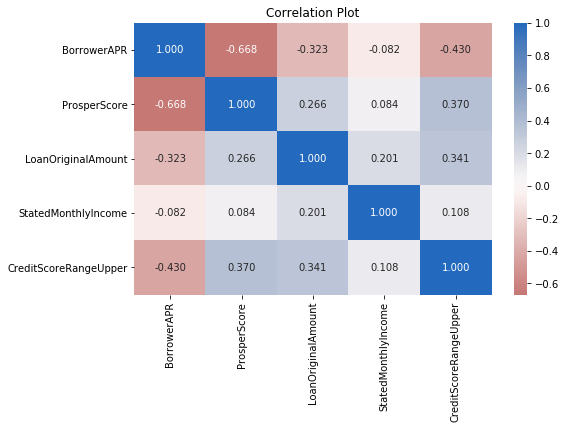

In [92]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(x.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.title('Correlation Plot') 
plt.show();

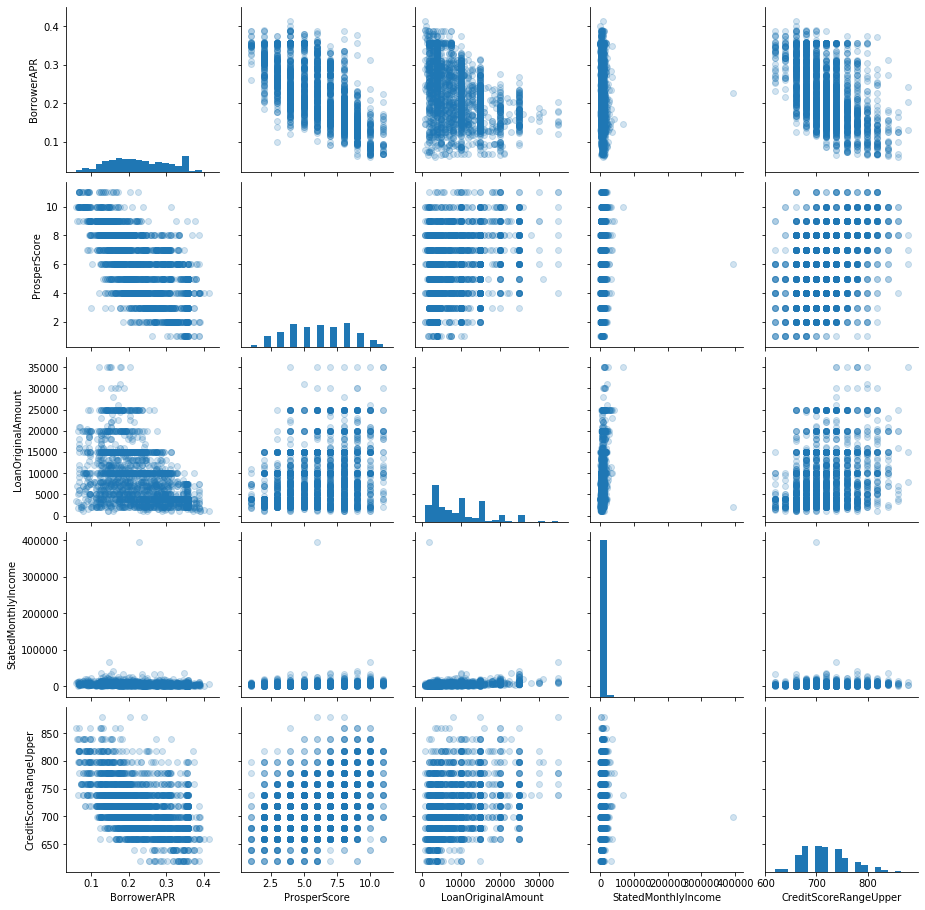

In [23]:
# matrix plot for 3000 sample loans.
df_loan_clean_samp = df_loan_clean.sample(3000)
g = sb.PairGrid(data = df_loan_clean_samp.dropna(), vars = num_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

The correlation coefficient of borrower APR and loan original amount is -0.323, the scatter plot also shows that these two variables are negatively correlated, which means that is the more the loan amount, the lower the APR. Furthermore, the loan original amount is positively correlated with the stated monthly income with a correlation coefficient of 0.404 which also means that borrowers with more monthly income could loan more money.

<Figure size 576x576 with 0 Axes>

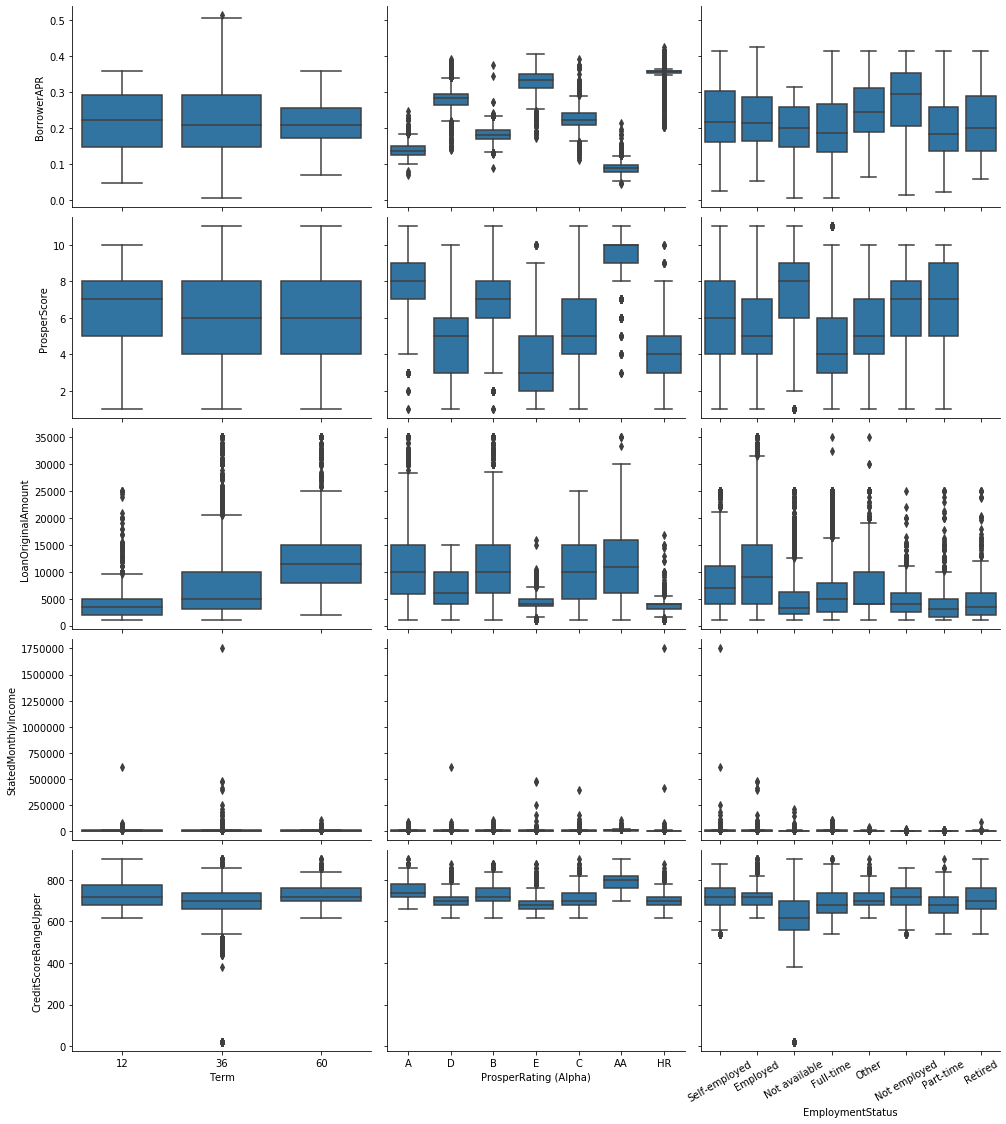

In [24]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [8, 8])
g = sb.PairGrid(data = df_loan_clean, y_vars = ['BorrowerAPR', 'ProsperScore', 'LoanOriginalAmount','StatedMonthlyIncome', 
            'CreditScoreRangeUpper'], 
                x_vars = cat_vars, height = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);

The figure shows that the loan amount is increased with the increase of loan term. The borrower APR decreases with the better rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR. Borrowers with better rating also have larger monthly income and loan amount. Employed, self-employed and full time borrowers have more monthly income and loan amount than part-time, retired and not employed borrowers.

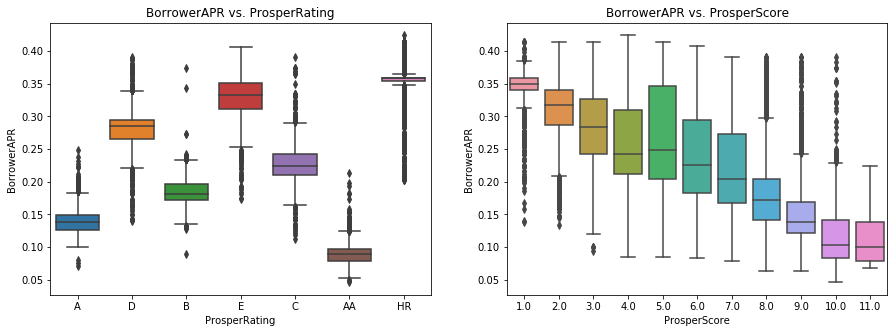

In [25]:
# Boxplot for BorrowerAPR vs. ProsperRating & ProsperScore. Shows higher rating has lower BorrowerAPR
plt.figure(figsize = [25, 15]) 

plt.subplot(1, 2, 1)
sb.boxplot(data = df_loan_clean, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR')
plt.gcf().set_size_inches(15, 5)
plt.title('BorrowerAPR vs. ProsperRating')
plt.xlabel('ProsperRating')
plt.ylabel('BorrowerAPR')

plt.subplot(1, 2, 2)
sb.boxplot(data = df_loan_clean, x = 'ProsperScore', y = 'BorrowerAPR')
plt.gcf().set_size_inches(15, 5)
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

It can be seen that there is no much correlation on ProsperRating which implies that either good or bad rating does not affect the percentage of APR the borrower is going to get. On the other hand, there is neagtive relationship between ProsperScore andBorrowerAPR.

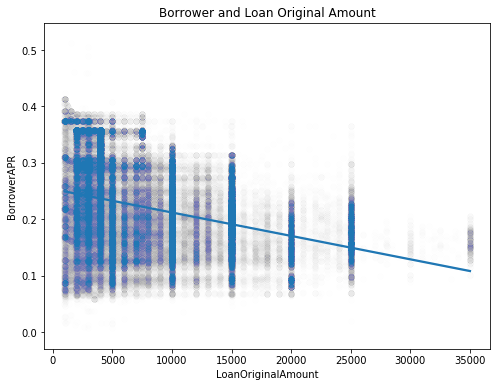

In [72]:
# Plot Borrower and Loan Original Amount
plt.figure(figsize = [8, 6])
sb.regplot(data = df_loan_clean, x = 'LoanOriginalAmount', y = 'BorrowerAPR', x_jitter =20, 
           scatter_kws={'alpha':1/200} )
plt.title('Borrower and Loan Original Amount');


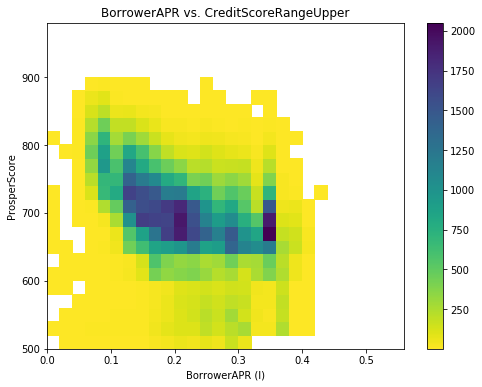

In [38]:
# heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [8, 6]) 

bins_x = np.arange(0, df_loan_clean['BorrowerAPR'].max()+0.05, 0.02)
bins_y = np.arange(500, df_loan_clean['CreditScoreRangeUpper'].max()+100, 20)
plt.hist2d(data = df_loan_clean, x = 'BorrowerAPR', y = 'CreditScoreRangeUpper', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('ProsperScore');

The heatmap shows that the higher the CreditScore, the lower APR percentage.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The borrower APR is negatively associated with the loan original amount, which mean the more the loan amount, the lower the APR. It also shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. The Prosper rating also has a strong effect on the borrower APR, which decreases with the better rating. Finally, the higher the Credit Score, the lower the borrower APR percentage.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money. It also shows that borrowers with better rating also have larger monthly income and loan amount. 

## Multivariate Exploration

> In this section,  I want to explore the role of Prosper rating and term played in relation to borrower APR and loan original amount.

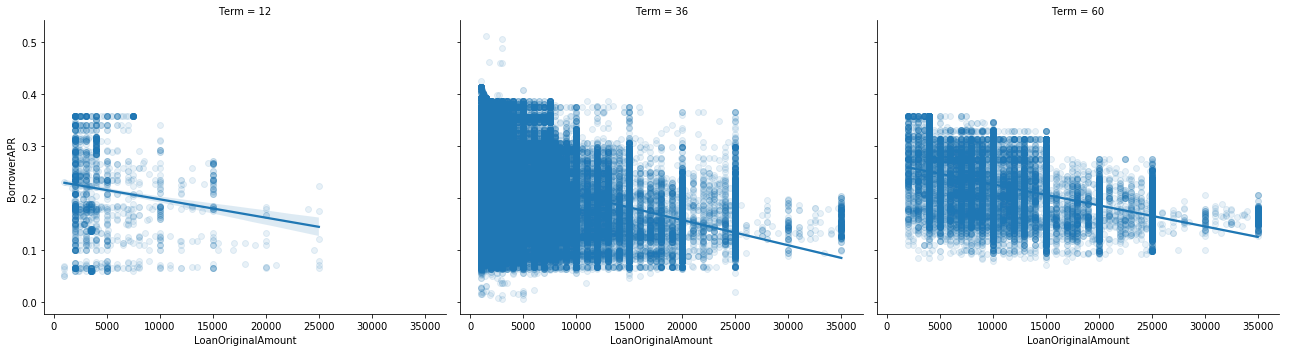

In [90]:
 #Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=df_loan_clean, aspect=1.2, height=5, col='Term', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

Form the figure, it does not seem like term have effect on the relationship of APR and loan amount

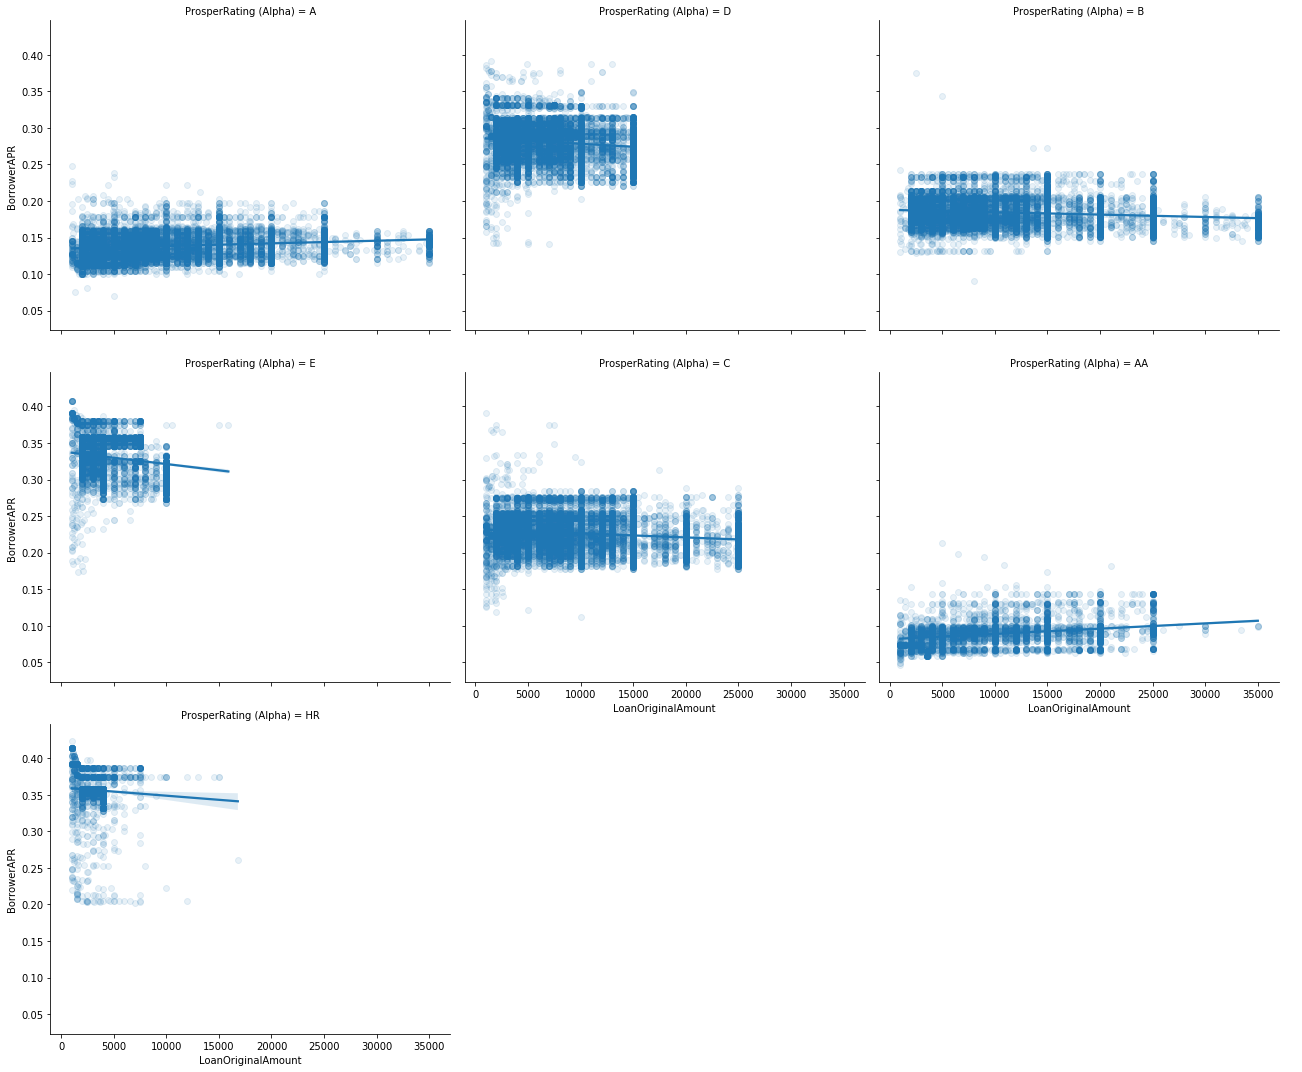

In [91]:
# Prosper rating effect on the relationship of APR and loan amount
g=sb.FacetGrid(data=df_loan_clean, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

The loan amount increases with better rating. The borrower APR decreases with better rating. Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better. This may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

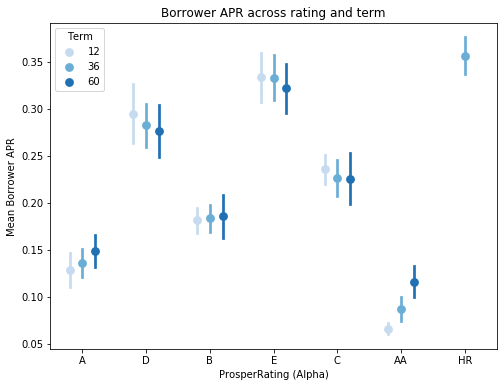

In [93]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_loan_clean, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

The borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term.

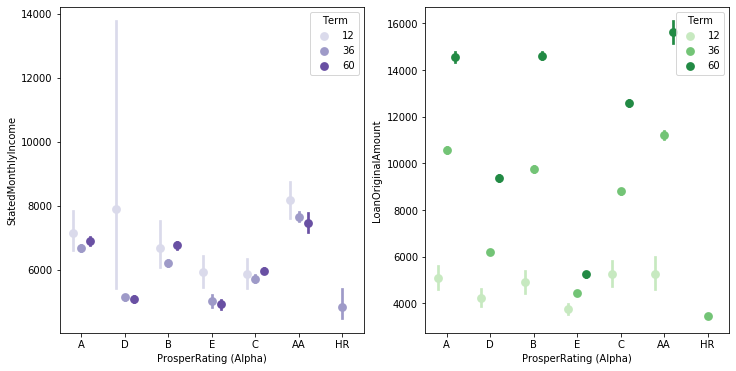

In [94]:
# The rating and term effects on stated monthly income and loan original amount variables
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = df_loan_clean, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = df_loan_clean, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

For stated monthly income, it doesn't seem like there is a interaction effect between term and rating, the pattern of term is similar among different ratings. But for loan amount, there is an interaction between term and rating. We can see that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The impact of the Prosper rating on borrower APR was also looked into. The result showed that the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA.  Also the rating and term effects on loan amount was explored, it shows that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

### Were there any interesting or surprising interactions between features?

>Interestingly, the borrower APR and loan amount is negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA. Another interesting thing is that the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the borrow term.